In [1]:
import numpy as np
import umap
import matplotlib.pyplot as plt

2025-04-10 15:56:01.779814: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-10 15:56:01.811443: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744280761.850257    1720 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744280761.861868    1720 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-10 15:56:01.898861: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
embeddings = np.load('embeddings_efficientnetb0.npy')
labels = np.load('labels_efficientnetb0.npy')

In [3]:
# Reduce dimensions with UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
embeddings_umap = umap_model.fit_transform(embeddings)

/root/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


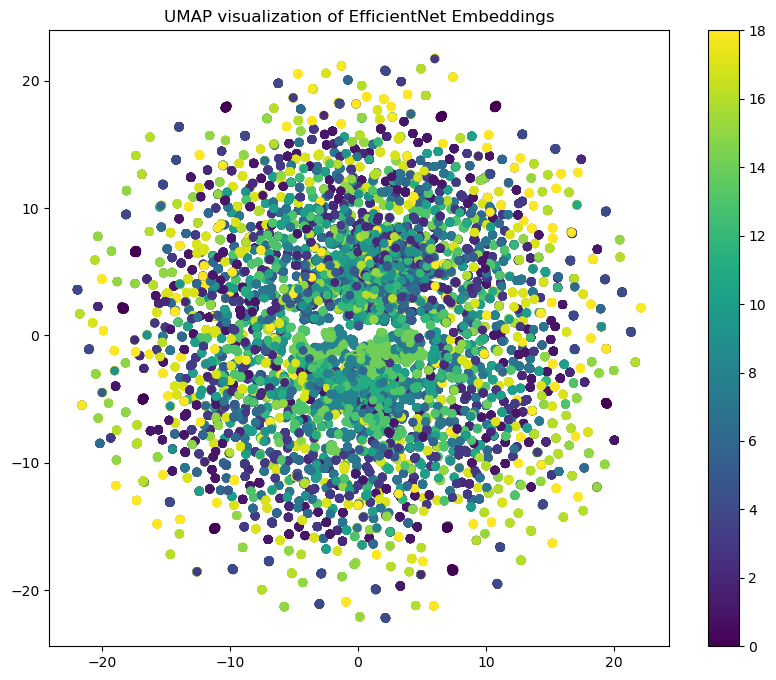

In [4]:
# Plot UMAP result
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], c=labels, cmap='viridis', s=30)
plt.colorbar()
plt.title("UMAP visualization of EfficientNet Embeddings")
plt.show()

In [ ]:
# Plot histograms of embeddings to check distribution
plt.figure(figsize=(12, 6))

for i in range(embeddings.shape[1]):
    plt.subplot(1, embeddings.shape[1], i+1)
    plt.hist(embeddings[:, i], bins=30)
    plt.title(f"Embedding dimension {i+1}")
    
plt.tight_layout()
plt.show()

/tmp/ipykernel_29355/3289480179.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


/root/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/root/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:427: UserWarning: Exited at iteration 412 with accuracies 
[9.61239051e-15 1.04904211e-05 9.51864195e-06 4.18736213e-06]
not reaching the requested tolerance 5.036592483520508e-06.
Use iteration 412 instead with accuracy 
6.049106287701357e-06.

  _, diffusion_map = lobpcg(
/root/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:427: UserWarning: Exited postprocessing with accuracies 
[5.75275532e-15 1.04904249e-05 9.51863768e-06 4.18736228e-06]
not reaching the requested tolerance 5.036592483520508e-06.
  _, diffusion_map = lobpcg(


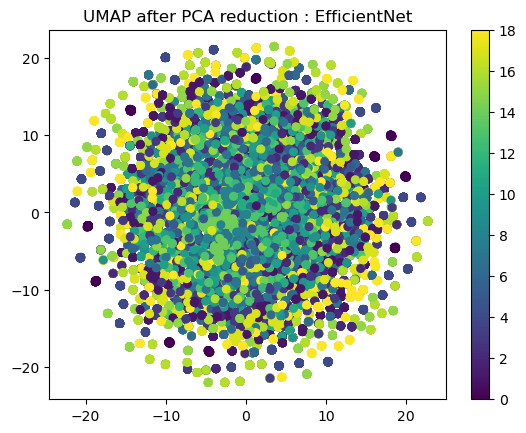

In [3]:
from sklearn.decomposition import PCA

# First reduce dimensions using PCA
pca = PCA(n_components=50)
embeddings_pca = pca.fit_transform(embeddings)

# Then apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
embeddings_umap = umap_model.fit_transform(embeddings_pca)

# Visualize with UMAP
plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], c=labels, cmap='viridis', s=30)
plt.colorbar()
plt.title("UMAP after PCA reduction : EfficientNet")
plt.show()

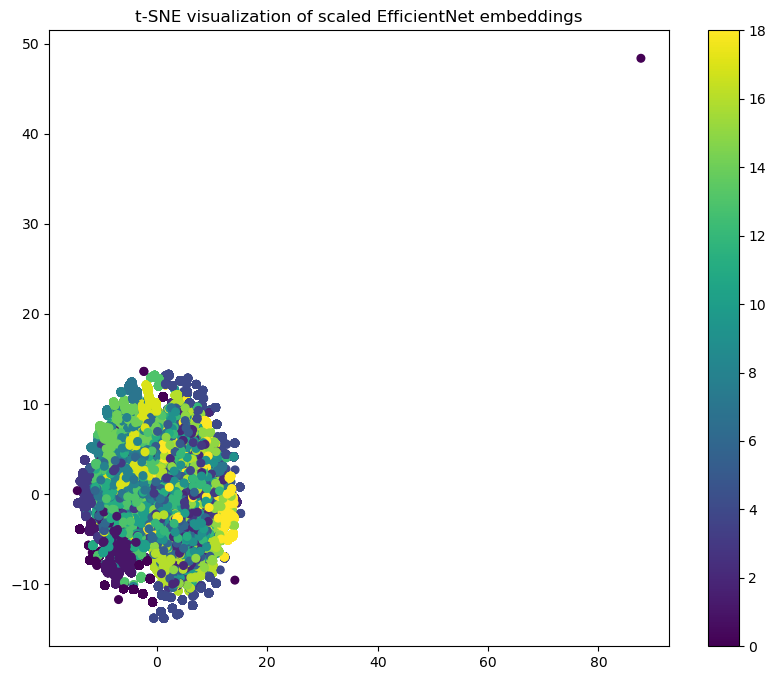

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# First, standardize embeddings
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)

# Apply t-SNE after scaling
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
embeddings_tsne = tsne.fit_transform(embeddings_scaled)

# Visualize the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=labels, cmap='viridis', s=30)
plt.colorbar(scatter)
plt.title("t-SNE visualization of scaled EfficientNet embeddings")
plt.show()

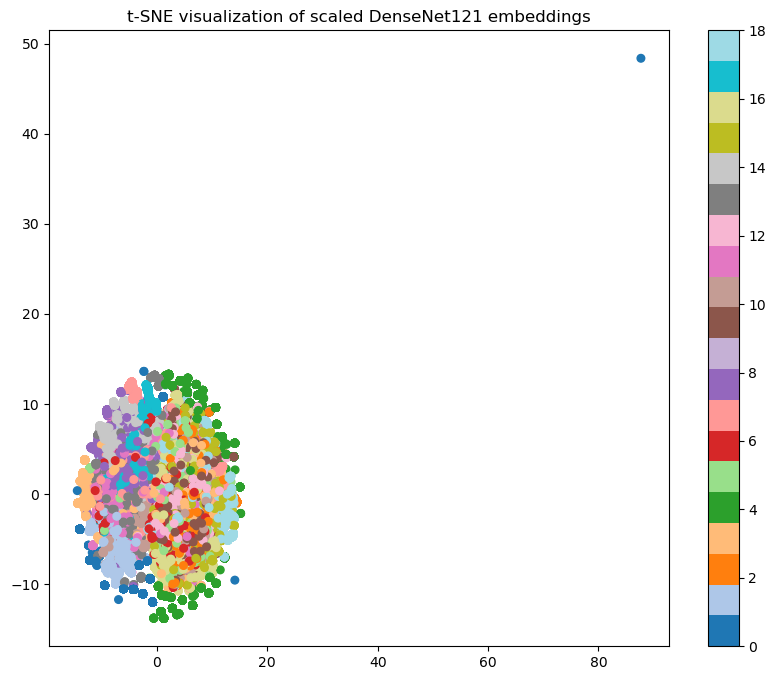

In [5]:
# Visualize the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=labels, cmap='tab20', s=30)
plt.colorbar(scatter)
plt.title("t-SNE visualization of scaled DenseNet121 embeddings")
plt.show()

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train a k-NN classifier on the embeddings
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(embeddings_scaled, labels)

# Evaluate accuracy
predictions = knn.predict(embeddings_scaled)
accuracy = accuracy_score(labels, predictions)
print(f"k-NN accuracy: {accuracy * 100:.2f}%")

k-NN accuracy: 93.83%


In [7]:
from sklearn.metrics import classification_report
report = classification_report(labels, predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3530
           1       0.97      1.00      0.98      3520
           2       0.86      0.97      0.91      3460
           3       0.95      0.97      0.96      3450
           4       0.99      1.00      1.00      3433
           5       0.82      0.65      0.72      3382
           6       0.88      0.99      0.93      3456
           7       0.98      0.97      0.98      3461
           8       0.97      0.96      0.97      3398
           9       0.83      0.86      0.85      3485
          10       0.94      0.94      0.94      3449
          11       0.96      0.74      0.84      3381
          12       0.90      0.80      0.84      3471
          13       0.97      0.98      0.98      3503
          14       0.97      0.99      0.98      3467
          15       0.96      1.00      0.98      3480
          16       0.96      1.00      0.98      3473
          17       0.96    

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Apply k-means clustering
kmeans = KMeans(n_clusters=len(set(labels)), random_state=42)
cluster_labels = kmeans.fit_predict(embeddings_scaled)

# Evaluate using Adjusted Rand Index (ARI)
ari = adjusted_rand_score(labels, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

# Evaluate clustering with silhouette score
sil_score = silhouette_score(embeddings_scaled, cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")

Adjusted Rand Index (ARI): 0.1451
Silhouette Score: 0.0218
